[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fernigithub/series_temporales_101/blob/main/notebooks/Series_temporales_python.ipynb)

# Introducción al analisis de series temporales

<img src="media/mgeo_banner.jpeg" style="width: 70%; display: block; margin: auto;">

## Después de completar este Notebook y seguir las instrucciones, podrás:

- **Aprender a importar series temporales y convertirlas al tipo de dato datetime**  

- **Indexar, cortar y manipular series temporales**  

- **Aumentar la frecuencia (Upsample) y disminuir la frecuencia (Downsample) de tus datos de series temporales**  

- **Aprender diferentes métodos para llenar valores faltantes al aumentar la frecuencia de los datos**  

- **Conocer métodos de agregación al disminuir la frecuencia de los datos de series temporales**  

- **Aprender a usar la función de Ventana Móvil para comprender tus datos de series temporales a un nivel más macro**  

- **¿Tienes dos series temporales? Aprende cómo comparar series temporales con correlación**

## Funcionalidad de series de tiempo y fechas

Representan puntos en el tiempo o períodos de tiempo. Contienen atributos y métodos para acceder y manipular la dimensión temporal de los datos.

Cualquier columna puede tener información de fecha y hora, pero es importante tenerla como índice, ya que como índice de timestamp/período convierte todo el dataframe en una serie temporal.

### Bloque básico de construcción: pd.Timestamp


In [2]:
import pandas as pd
from datetime import datetime 

In [3]:
time_stamp = pd.Timestamp(datetime(2017,1,1))
pd.Timestamp('2017-01-01') == time_stamp # confirmacion

True

In [6]:
time_stamp

# automaticamente seteado a las 00:00:00 (media noche)

Timestamp('2017-01-01 00:00:00')

In [9]:
time_stamp.year

2017

### Más bloques de construcción: pd.Period y freq

El objeto Period tiene un atributo freq para almacenar información de frecuencia que puede configurarse como mensual o diario.

Puedes convertir un objeto Period a timestamp y viceversa.

La información de frecuencia permite la aritmética básica de fechas.


Este objeto Period representa un período de tiempo, en este caso, el mes de enero de 2017. La cadena "2017-01" especifica el año y el mes para el período.

In [25]:
period=pd.Period("2017-01")
period

Period('2017-01', 'M')

El método asfreq en Pandas se utiliza para cambiar la frecuencia de un objeto Period. En este caso, period.asfreq("D", how="start") cambia la frecuencia del objeto Period llamado period a diaria ("D"), y especifica que el nuevo período debe comenzar en el inicio ("start") del período original.

In [29]:
period.asfreq("D",how="start")

Period('2017-01-01', 'D')

*period.to_timestamp()*

Convierte el objeto Period a un objeto Timestamp. Un Period representa un intervalo de tiempo (como un mes o un año), mientras que un Timestamp representa un punto específico en el tiempo (como una fecha y hora específicas). Esta conversión toma el inicio del período y lo convierte en un Timestamp.

*.to_period("M")*

Convierte el objeto Timestamp resultante de nuevo a un objeto Period, pero esta vez con una frecuencia mensual ("M"). Esto significa que el Timestamp se convertirá en un Period que representa el mes en el que cae el Timestamp.

In [30]:
period.to_timestamp().to_period("M")

Period('2017-01', 'M')

In [31]:
period+2

Period('2017-03', 'M')

### Secuencias de fechas y horas

Puedes crear una serie temporal especificando el rango de fechas, inicio, fin, períodos y frecuencia.

In [35]:
index=pd.date_range(start="2017-1-1", periods=12, freq="M")

In [33]:
index #datetime64 es el datatype , ns es nanosegundos


DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [36]:
index[0] #el primer elemento es un timestamp

Timestamp('2017-01-31 00:00:00')

In [37]:
index.to_period() # crea un index con timestamps

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

In [38]:
pd.DataFrame ({'data':index}).info() # hicimos una serie temporal con fechas como indice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [39]:
import numpy as np
data=np.random.random(size=(12,2))
pd.DataFrame(data=data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


## Indexación y remuestreo de series temporales

### Las transformaciones básicas de series temporales incluyen:

- Parsear fechas en cadena y convertirlas a datetime64.
- Seleccionar y segmentar períodos específicos.
- Establecer y cambiar la frecuencia de DateTimeIndex {Upsampling y Downsampling}.


In [43]:
import pandas as pd
url = "https://raw.githubusercontent.com/Fernigithub/series_temporales_101/main/notebooks/csv/goog.csv"
google=pd.read_csv(url)

In [45]:
google.info()
display(google.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Open    61 non-null     float64
 2   High    61 non-null     float64
 3   Low     61 non-null     float64
 4   Close   61 non-null     float64
 5   Volume  61 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


## Convertir fechas en cadena a datetime64

Dos métodos:

pd.to_datetime()
- Parsear cadena de fecha.
- Convertir a datetime64.

In [46]:
google.Date=pd.to_datetime(google.Date)

In [47]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    61 non-null     datetime64[ns]
 1   Open    61 non-null     float64       
 2   High    61 non-null     float64       
 3   Low     61 non-null     float64       
 4   Close   61 non-null     float64       
 5   Volume  61 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 3.0 KB


In [48]:
google.set_index("Date", inplace=True)
google.info()

# El DateTimeIndex resultante le permite tratar todo el DataFrame como datos de series temporales

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2016-12-19 to 2017-03-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    61 non-null     float64
 1   High    61 non-null     float64
 2   Low     61 non-null     float64
 3   Close   61 non-null     float64
 4   Volume  61 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.9 KB


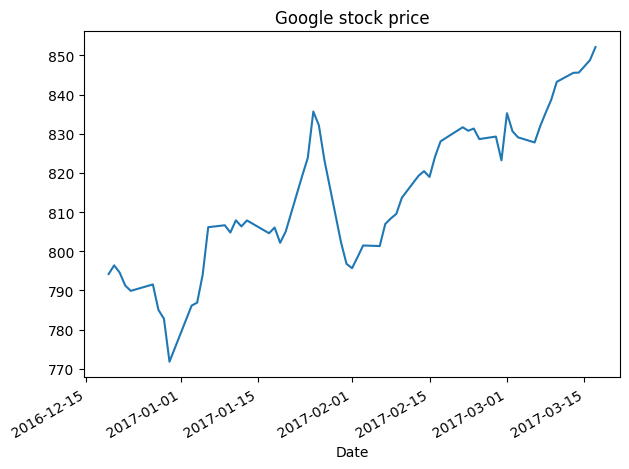

In [52]:
import matplotlib.pyplot as plt
google.Close.plot(title="Google stock price")
plt.tight_layout()
plt.show()

## Indexación parcial de cadenas

- Seleccionar/indexar usando cadenas de texto que se convierten a fechas.


In [55]:
google.loc["2017"].info()

google.loc["2017"].head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2017-01-03 to 2017-03-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    52 non-null     float64
 1   High    52 non-null     float64
 2   Low     52 non-null     float64
 3   Close   52 non-null     float64
 4   Volume  52 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.4 KB


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.809998,789.630005,775.799988,786.140015,1643100
2017-01-04,788.359985,791.340027,783.159973,786.900024,1065400
2017-01-05,786.080017,794.479980,785.020020,794.020020,1315400
2017-01-06,795.260010,807.900024,792.203979,806.150024,1620500
2017-01-09,806.400024,809.966003,802.830017,806.650024,1272400


In [59]:
display(google["2016-10":"2017-3"])

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...
2017-03-13,844.000000,848.684998,843.250000,845.539978,1149500
2017-03-14,843.640015,847.239990,840.799988,845.619995,779900
2017-03-15,847.590027,848.630005,840.770020,847.200012,1379600


## Establecer frecuencia usando .asfreq()

Convertir DateTimeIndex a frecuencia de día calendario.

In [62]:
google_upsampled=google.asfreq("D")

In [63]:
google_upsampled.head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900.0
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100.0
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700.0
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100.0
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400.0
2016-12-24,NaN,NaN,NaN,NaN,NaN
2016-12-25,NaN,NaN,NaN,NaN,NaN
2016-12-26,NaN,NaN,NaN,NaN,NaN
2016-12-27,790.679993,797.859985,787.656982,791.549988,789100.0


Arriba, puedes ver que las fechas faltantes de los informes de acciones se han llenado con valores NaN.

Mes a día -> Upsampling (aumentar la frecuencia)
Día a mes -> Downsampling (disminuir la frecuencia)

También podemos cambiar la frecuencia a días hábiles.

In [65]:
google_businessdays=google.asfreq("B")
google_businessdays.head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900.0
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100.0
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700.0
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100.0
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400.0
2016-12-26,NaN,NaN,NaN,NaN,NaN
2016-12-27,790.679993,797.859985,787.656982,791.549988,789100.0
2016-12-28,793.700012,794.229980,783.200012,785.049988,1132700.0
2016-12-29,783.330017,785.929993,778.919983,782.789978,742200.0


## Cálculos básicos de series temporales

Las manipulaciones típicas de series temporales incluyen:

- Desplazar o retrasar valores en el tiempo.
- Obtener la diferencia en valor para un período de tiempo dado.
- Calcular el cambio porcentual sobre cualquier número de períodos.

Los métodos integrados de pandas dependen de pd.DateTimeIndex.

In [69]:
google=pd.read_csv("https://raw.githubusercontent.com/Fernigithub/series_temporales_101/main/notebooks/csv/goog.csv", parse_dates=["Date"], index_col="Date")
#this is another method to make a dataframe for google stocks as you are parsing date column as time series
#and now you will not need to convert to datetime object

In [70]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2016-12-19 to 2017-03-17
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    61 non-null     float64
 1   High    61 non-null     float64
 2   Low     61 non-null     float64
 3   Close   61 non-null     float64
 4   Volume  61 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.9 KB


In [71]:
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400


Aqui, puedes ver que la serie temporal está correctamente formateada con la fecha como índice del dataframe. Nos ayuda a omitir la conversión a objeto datetime y luego establecer el índice en la columna de fecha.

### .shift(): Moviendo valores en el tiempo

.shift():

<li> defaults = 1 </li>
<li> 1 período hacia el futuro </li>

In [72]:
google["shifted"]=google.Close.shift(periods=1)
google.head()

,Open,High,Low,Close,Volume,shifted
Date,,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900,NaN
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100,794.200012
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700,796.419983
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100,794.559998
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400,791.260010


In [73]:
google["lagged"]=google.Close.shift(periods=-1) #negativo para adelante en el tiempo
google.tail(5)

,Open,High,Low,Close,Volume,shifted,lagged
Date,,,,,,,
2017-03-13,844.000000,848.684998,843.250000,845.539978,1149500,843.250000,845.619995
2017-03-14,843.640015,847.239990,840.799988,845.619995,779900,845.539978,847.200012
2017-03-15,847.590027,848.630005,840.770020,847.200012,1379600,845.619995,848.780029
2017-03-16,849.030029,850.849976,846.130005,848.780029,970400,847.200012,852.119995
2017-03-17,851.609985,853.400024,847.109985,852.119995,1712300,848.780029,NaN


En el caso de shift, los valores se mueven un lugar hacia el futuro y en el caso de lag, los valores se mueven un lugar hacia el pasado.
Es útil para comparar datos en diferentes momentos en el tiempo.

### Calcular one-period porcentaje de cambio

xt/xt-1

Usaremos el método div que no solo permite encontrar la fracción para un valor particular en el dataframe, sino también a través de diferentes columnas en series temporales.

In [74]:
google["change"]=google.Close.div(google.shifted)

In [75]:
google.head()

,Open,High,Low,Close,Volume,shifted,lagged,change
Date,,,,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900,NaN,796.419983,NaN
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100,794.200012,794.559998,1.002795
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700,796.419983,791.260010,0.997665
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100,794.559998,789.909973,0.995847
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400,791.260010,791.549988,0.998294


## .diff(): cambio de valor de un período

Diferecia en valor para dos períodos adyacentes

xt-x(t-1)

In [76]:
google["diff"]=google.Close.diff()

In [77]:
google.head()

,Open,High,Low,Close,Volume,shifted,lagged,change,diff
Date,,,,,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900,NaN,796.419983,NaN,NaN
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100,794.200012,794.559998,1.002795,2.219971
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700,796.419983,791.260010,0.997665,-1.859985
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100,794.559998,789.909973,0.995847,-3.299988
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400,791.260010,791.549988,0.998294,-1.350037


## .pct_change(): % de cambio

Calcular el cambio de período y porcentaje es bastante común, pandas tiene un método incorporado .pct_change() para calcular el cambio porcentual para dos períodos adyacentes.

xt/x(t-1)

In [78]:
google["pct_change"]=google.Close.pct_change().mul(100)
google.head()

,Open,High,Low,Close,Volume,shifted,lagged,change,diff,pct_change
Date,,,,,,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900,NaN,796.419983,NaN,NaN,NaN
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100,794.200012,794.559998,1.002795,2.219971,0.279523
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700,796.419983,791.260010,0.997665,-1.859985,-0.233543
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100,794.559998,789.909973,0.995847,-3.299988,-0.415323
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400,791.260010,791.549988,0.998294,-1.350037,-0.170619


## Comparando tasas de crecimiento de series temporales

Esto nos ayudara a comparar diferentes tasas de crecimiento en una serie temporal.

Las series de precios de las acciones son difíciles de comparar porque comienzan en diferentes niveles. Un método más fácil es normalizar las series de precios para que comiencen en 100 de modo que comiencen en el mismo valor.

Hacemos esto dividiendo todos los precios por el primer elemento de la serie y luego multiplicando por 100. Esto dará el mismo punto de partida a las series temporales. Todos los precios se convertirán en relativos al punto de partida. Reflejarán la diferencia al punto de partida en puntos porcentuales.

In [79]:
google.head()

,Open,High,Low,Close,Volume,shifted,lagged,change,diff,pct_change
Date,,,,,,,,,,
2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900,NaN,796.419983,NaN,NaN,NaN
2016-12-20,796.760010,798.650024,793.270020,796.419983,925100,794.200012,794.559998,1.002795,2.219971,0.279523
2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700,796.419983,791.260010,0.997665,-1.859985,-0.233543
2016-12-22,792.359985,793.320007,788.580017,791.260010,969100,794.559998,789.909973,0.995847,-3.299988,-0.415323
2016-12-23,790.900024,792.739990,787.280029,789.909973,623400,791.260010,791.549988,0.998294,-1.350037,-0.170619


In [80]:
first_price=google.Close.iloc[0]
first_price

794.200012

<Axes: title={'center': 'Google normalized Series'}, xlabel='Date'>

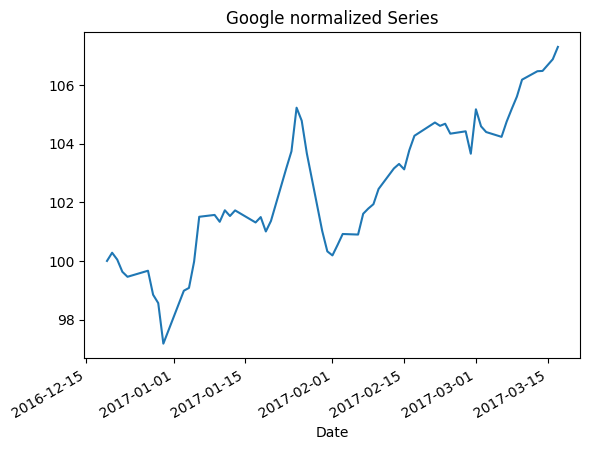

In [81]:
normalized=google.Close.div(first_price).mul(100)
normalized.plot(title="Google normalized Series")

## Cambiando la frecuencia de las series temporales: remuestreo (resampling)

A veces, puede ser necesario convertir dos series temporales a la misma frecuencia para poder analizarlas juntas.

En las secciones anteriores, hemos visto cómo podemos usar DateTimeIndex para establecer y cambiar la frecuencia usando .asfreq()

Sin embargo, la conversión de frecuencia afecta a los datos.

<li> Cuando aumentamos la frecuencia de los datos, tenemos nuevas filas que contienen las fechas faltantes y necesitamos llenar o interpolar los datos faltantes </li>

<li> Por otro lado, si disminuimos la frecuencia de los datos, se supone que debemos agregar los datos existentes </li>

#### Comencemos a trabajar con datos trimestrales

In [82]:
dates=pd.date_range(start="2016", periods=4, freq="Q")
data=range(1,5)
quarterly=range(1,5)
quarterly=pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [83]:
# remuestreo (upsampling) de datos trimestrales a mensuales

monthly=quarterly.asfreq("M")
monthly

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

Se dara cuenta aqui que pandas ha agregado meses entre los trimestres para tener en cuenta el upsampling.

Veremos diferentes métodos que ofrece pandas para llenar los valores faltantes

Crearemos un DataFrame que contenga todas las alternativas al valor base, nuestra primera columna.


In [84]:
monthly=monthly.to_frame("baseline")

In [85]:
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


## Upsampling: métodos de relleno
<br>
<li> Relleno hacia adelante </li>
<li> Relleno hacia atrás </li> 
<li> Relleno con un valor </li>

In [86]:
monthly['ffill']=quarterly.asfreq("M",method="ffill")
monthly["bfill"]=quarterly.asfreq("M",method="bfill")
monthly['value']=quarterly.asfreq("M",fill_value=0)

In [87]:
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


## Agregar valores faltantes: .reindex()

In [88]:
dates=pd.date_range(start="2016", periods=12, freq="M")
dates

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

.reindex():
    
<li> adaptar el DataFrame al nuevo índice </li>
<li> lógica de relleno coherente como en .asfreq() </li>


In [89]:
quarterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

## Remuestreo e interpolación con .resample()

.resample() es similar a .groupby()

<li> Agrupa datos dentro del período de remuestreo y aplica uno o varios métodos a cada grupo </li>
<li> Nueva fecha determinada por el desplazamiento: inicio, fin, etc. </li>
<li> Remuestreo hacia arriba: rellenar desde valores existentes o interpolar valores </li>

In [93]:
unrate=pd.read_csv("https://raw.githubusercontent.com/Fernigithub/series_temporales_101/main/notebooks/csv/unrate.csv", parse_dates=["DATE"], index_col="DATE")
unrate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 778 entries, 1948-01-01 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALUE   778 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [94]:
unrate.head() 

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


## Período de remuestreo y desfases de frecuencia
<br>

<li> Resample crea una nueva fecha para el desfase de frecuencia </li>
<li> Varias alternativas al final del mes calendario </li>

<ul> Fin de mes calendario: "M" </ul>
<ul> Inicio de mes calendario: "MS" </ul>
<ul> Fin de mes laboral: "BM" </ul>
<ul> Inicio de mes laboral: "BMS" </ul>

In [95]:
unrate.asfreq("D")

,VALUE
DATE,
1948-01-01,3.4
1948-01-02,NaN
1948-01-03,NaN
1948-01-04,NaN
1948-01-05,NaN
...,...
2012-09-27,NaN
2012-09-28,NaN
2012-09-29,NaN


In [96]:
unrate.asfreq("MS").equals(unrate.resample("MS").asfreq())

True

Podemos establecer los datos en el final del mes y luego usar el relleno hacia adelante para llenar los datos y remuestrear en consecuencia.

In [97]:
unrate_ffill=unrate.resample("D").ffill().add_suffix("_ffill")

In [98]:
unrate_ffill

,VALUE_ffill
DATE,
1948-01-01,3.4
1948-01-02,3.4
1948-01-03,3.4
1948-01-04,3.4
1948-01-05,3.4
...,...
2012-09-27,7.8
2012-09-28,7.8
2012-09-29,7.8


## Submuestreo y agregación
<br>

A veces, puede ser necesario submuestrear nuestros datos; de hora a día y de día a mes.

En este caso, necesitamos pensar cómo representar los valores existentes en la nueva fecha; ¿media, mediana o algo más?

Volviendo a los datos de Google, la frecuencia está establecida como "Diaria". Intentaremos crear datos mensuales mediante el remuestreo de los datos diarios

In [99]:
google.resample("M").mean().head() # esto asigna el promedio mensual al final del mes calendario
# podemos hacer algo similar para los valores medianos

,Open,High,Low,Close,Volume,shifted,lagged,change,diff,pct_change
Date,,,,,,,,,,
2016-12-31,790.726671,793.316223,784.743001,788.617771,1.041822e+06,790.717491,787.722216,0.996447,-2.797501,-0.355349
2017-01-31,807.525998,811.926257,801.949747,807.904752,1.635595e+06,806.656253,808.382501,1.001645,1.248499,0.164506
2017-02-28,815.316310,819.286264,812.471843,816.916581,1.345647e+06,815.526052,818.997896,1.001725,1.390529,0.172496
2017-03-31,838.174622,841.406151,835.010080,839.323078,1.183215e+06,837.099234,839.663335,1.002669,2.223844,0.266912


In [100]:
google.resample("M").agg(['mean','std']).head()

Open                   High                    Low  \
                  mean        std        mean        std        mean   
Date                                                                   
2016-12-31  790.726671   4.907683  793.316223   5.545115  784.743001   
2017-01-31  807.525998  15.125429  811.926257  14.381323  801.949747   
2017-02-28  815.316310  11.496588  819.286264  11.356235  812.471843   
2017-03-31  838.174622   8.703806  841.406151   8.120600  835.010080   

                            Close                   Volume                 \
                  std        mean        std          mean            std   
Date                                                                        
2016-12-31   6.632983  788.617771   7.692953  1.041822e+06  341630.278144   
2017-01-31  13.278518  807.904752  13.209970  1.635595e+06  651377.535022   
2017-02-28  12.297101  816.916581  12.136172  1.345647e+06  331132.023634   
2017-03-31   8.374326  839.323078   8.217668  1.183215e+06  304841.493912   

               shifted                 lagged               change            \
                  mean        std        mean        std      mean       std   
Date                                                                           
2016-12-31  790.717491   4.721028  787.722216   7.426405  0.996447  0.005462   
2017-01-31  806.656253  15.326205  808.382501  12.537045  1.001645  0.010436   
2017-02-28  815.526052  12.866613  818.997896  11.676774  1.001725  0.003742   
2017-03-31  837.099234   8.376251  839.663335   8.486888  1.002669  0.004785   

                diff           pct_change            
                mean       std       mean       std  
Date                                                 
2016-12-31 -2.797501  4.290851  -0.355349  0.546196  
2017-01-31  1.248499  8.437004   0.164506  1.043565  
2017-02-28  1.390529  3.059915   0.172496  0.374157  
2017-03-31  2.223844  3.958547   0.266912  0.478507

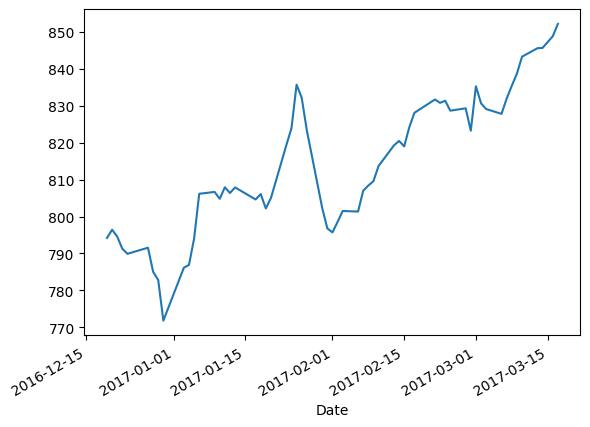

In [101]:
ax=google["Close"].plot()
monthly=google.resample("M").mean()


## Funciones de ventana deslizante

La función de ventana en Python es bastante útil ya que ayuda a identificar subperíodos de nuestras series temporales y nos ayuda a crear series temporales a partir de la serie temporal principal.

Nos ayuda a calcular métricas para subperíodos dentro de la ventana. También nos permite crear una nueva serie temporal que contiene puntos de datos que representan un resumen de varios puntos de datos de la serie temporal original.

Dos tipos principales de ventanas:

<li> Deslizante: de tamaño igual, deslizante </li>
<li> Expansiva: contiene todos los valores anteriores </li>

## Calculando un promedio móvil

Volvamos a los datos de Google

In [102]:
url = "https://raw.githubusercontent.com/Fernigithub/series_temporales_101/main/notebooks/csv/goog.csv"
data=pd.read_csv(url, parse_dates=["Date"], index_col="Date")

In [103]:
data.rolling(window=30).mean()

#window=30
#min_periods: choose value<30 to get results for first days

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-19,NaN,NaN,NaN,NaN,NaN
2016-12-20,NaN,NaN,NaN,NaN,NaN
2016-12-21,NaN,NaN,NaN,NaN,NaN
2016-12-22,NaN,NaN,NaN,NaN,NaN
2016-12-23,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-03-13,820.230996,824.056301,816.920203,821.266833,1.382643e+06
2017-03-14,821.196997,825.102966,818.286869,822.710166,1.301010e+06
2017-03-15,822.887998,826.682300,819.961869,824.390501,1.275547e+06


<Axes: xlabel='Date'>

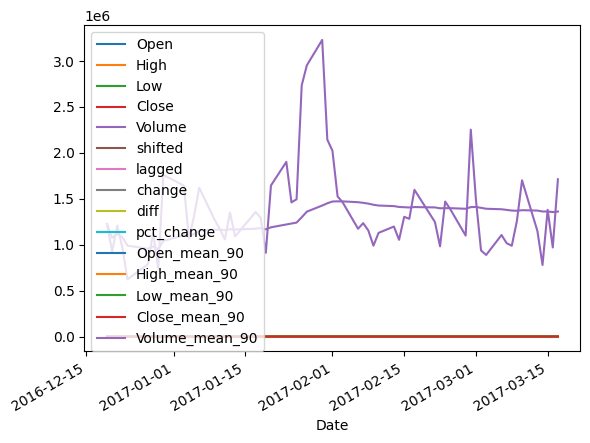

In [104]:
r90=data.rolling(window="90D").mean()
google.join(r90.add_suffix("_mean_90")).plot() 

Puedes observar que el gráfico que contiene datos de 90 días es mucho más suave porque cada punto de datos es el promedio de los 90 días anteriores.

También, puedes ver cuándo las tendencias a corto plazo se desvían de las tendencias a largo plazo. Por ejemplo, podemos señalar cuándo el promedio de 90 días cae por debajo del promedio de 360 días.

## Múltiples métricas móviles

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

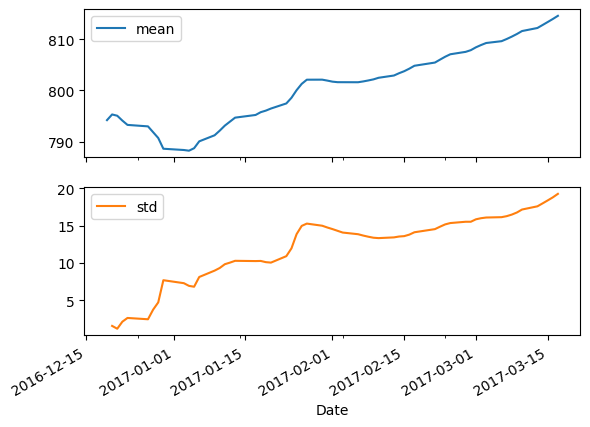

In [105]:
r=data.Close.rolling("90D").agg(["mean","std"])
r.plot(subplots=True)

<Axes: xlabel='Date'>

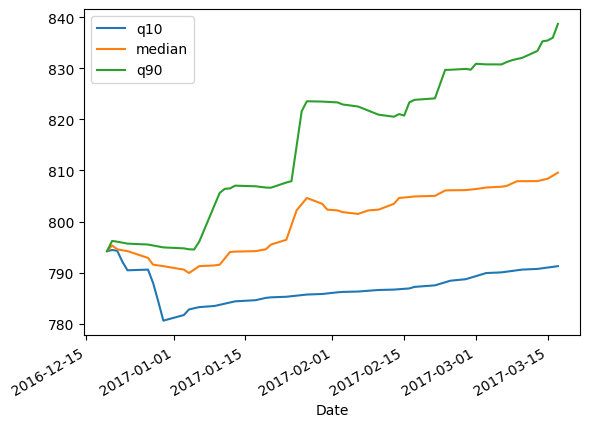

In [106]:
rolling=data.Close.rolling("360D")
q10=rolling.quantile(0.1).to_frame("q10")
median=rolling.median().to_frame("median")
q90=rolling.quantile(0.9).to_frame("q90")
pd.concat([q10,median,q90],axis=1).plot()

## Relación entre series temporales: correlación

Hasta ahora, nos hemos centrado en series temporales individuales, ahora comenzaremos a enfocarnos en las relaciones entre series temporales.

La correlación es básicamente una medida de las relaciones lineales. Es realmente importante para la predicción y la gestión del riesgo.

Pandas y seaborn tienen herramientas para calcular y visualizar.

El coeficiente de correlación mide cuán similar es el movimiento por pares de dos variables alrededor de sus promedios. El movimiento por pares se llama covarianza.
El coeficiente de correlación divide esta medida por el producto de las desviaciones estándar de cada variable. Varía entre -1 y +1. Cuanto más se acerca el valor a +1 o -1, más se asemeja a una línea recta.

Un signo positivo significa que cuando una entidad está por encima de la media, entonces la otra probablemente también esté por encima de su media. Sin embargo, hay numerosos tipos de relaciones no lineales que el coeficiente de correlación no captura.

In [136]:
bgold= pd.read_csv('csv/HistoricalData_BGoldcsv.csv').set_index('Date')
goog = pd.read_csv('csv/HistoricalData_Google.csv').set_index('Date')
intel = pd.read_csv('csv/HistoricalData_Intel.csv').set_index('Date')

data = pd.merge(goog, intel, left_index=True, right_index=True, suffixes=('_goog', '_intel'))
col = ['Open_goog', 'Open_intel']
data = data[col]
# remove $ sign and convert to float
data = data.replace({'\$': '', ',': ''}, regex=True).astype(float)
data

,Open_goog,Open_intel
Date,,
06/24/2024,180.1600,31.140
06/21/2024,177.0000,30.850
06/20/2024,175.3700,30.555
06/18/2024,177.1400,30.990
06/17/2024,175.4600,30.340
...,...,...
07/01/2014,29.3825,30.990
06/30/2014,29.3380,30.870
06/27/2014,29.2725,30.870


In [137]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 06/24/2024 to 06/25/2014
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open_goog   2516 non-null   float64
 1   Open_intel  2516 non-null   float64
dtypes: float64(2)
memory usage: 123.5+ KB


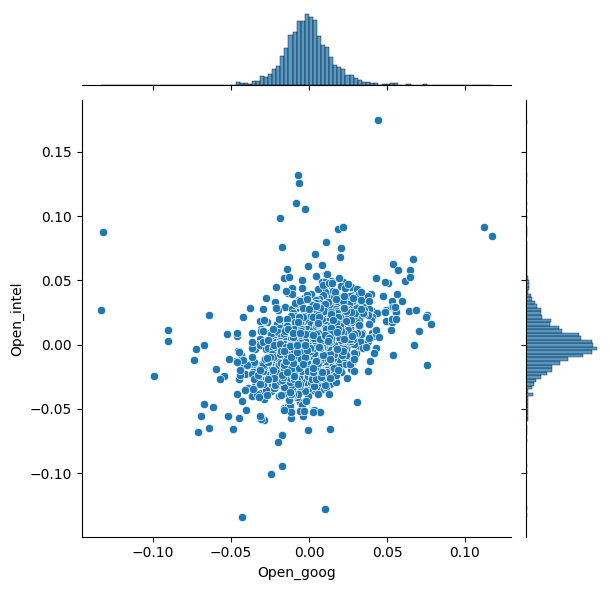

In [138]:
import seaborn as sns
daily_returns=data.pct_change()
sns.jointplot(x="Open_goog", y="Open_intel", data=daily_returns) #Jointplot helps to show the distribution of two variables together in one plot

We can notice from the graph that correlation is quite weak and the data is really quite scattered.

let's find the correlation numerically

In [135]:
correlations=daily_returns.corr()
correlations

,Open_goog,Open_intel
Open_goog,1.000000,0.085578
Open_intel,0.085578,1.000000


The numerical value confirms what we saw visually. Both the indices have a very weak correlation with a negative sign. 

<Axes: >

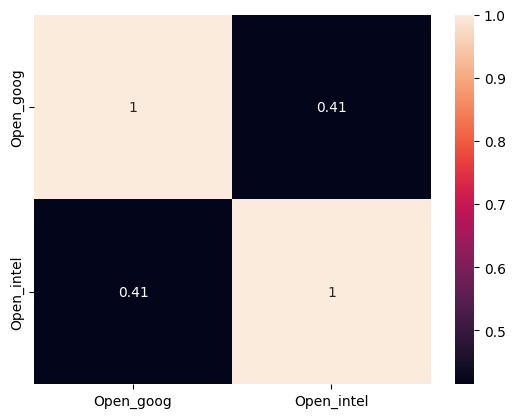

In [128]:
sns.heatmap(correlations, annot=True)